In [1]:
# !pip install mlforecast

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams

from mlforecast import MLForecast
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as MSE

In [3]:
rcParams['figure.figsize'] = 15, 6

In [4]:
path_matlab = "../../data/series/series_matlab.csv"
path_fires = "../../data/series/series_fires_acre.csv"

series_matlab = pd.read_csv(path_matlab)
series_fires = pd.read_csv(path_fires, encoding='ISO-8859-1')

In [5]:
series_matlab

,month,matlab
0,2009-01-31,19
1,2009-02-28,27
2,2009-03-31,24
3,2009-04-30,32
4,2009-05-31,42
...,...,...
127,2019-08-31,371
128,2019-09-30,362
129,2019-10-31,523
130,2019-11-30,479


In [6]:
series_matlab['month'] = pd.to_datetime(series_matlab['month'])

In [7]:
series_matlab['unique_id'] = 'matlab'
series_matlab.rename(columns={'month': 'ds', 'matlab': 'y'}, inplace=True)
series_matlab

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab
130,2019-11-30,479,matlab


In [8]:
test = series_matlab.groupby('unique_id').tail(12)
train = series_matlab.drop(test.index, axis = 0)

In [9]:
train

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
115,2018-08-31,404,matlab
116,2018-09-30,431,matlab
117,2018-10-31,519,matlab
118,2018-11-30,500,matlab


In [10]:
test

,ds,y,unique_id
120,2019-01-31,410,matlab
121,2019-02-28,364,matlab
122,2019-03-31,458,matlab
123,2019-04-30,492,matlab
124,2019-05-31,462,matlab
125,2019-06-30,365,matlab
126,2019-07-31,386,matlab
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab


In [11]:
models = [
    DecisionTreeRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

In [12]:
fcst = MLForecast(
    models=models,
    freq='M',
    lags=[1, 2, 3, 4, 5, 6, 7, 8, 9]
)

In [13]:
fcst.fit(train, fitted=True)

MLForecast(models=[DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9'], date_features=[], num_threads=1)

In [14]:
predictions = fcst.predict(12)
predictions

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

,unique_id,ds,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2019-01-31,519.0,512.380066,523.599976
1,matlab,2019-02-28,519.0,508.107971,518.400024
2,matlab,2019-03-31,500.0,522.242371,525.200012
3,matlab,2019-04-30,558.0,536.560608,576.200012
4,matlab,2019-05-31,579.0,546.277771,598.599976
5,matlab,2019-06-30,579.0,555.276123,598.599976
6,matlab,2019-07-31,579.0,569.422241,663.200012
7,matlab,2019-08-31,525.0,571.313110,663.200012
8,matlab,2019-09-30,561.0,594.748352,663.200012
9,matlab,2019-10-31,605.0,608.159119,740.200012


In [15]:
forecast = fcst.forecast_fitted_values()
forecast

,unique_id,ds,y,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2009-10-31,71.0,71.0,40.861629,99.400002
1,matlab,2009-11-30,117.0,117.0,50.928825,99.400002
2,matlab,2009-12-31,99.0,99.0,67.766830,99.400002
3,matlab,2010-01-31,99.0,99.0,69.035507,109.800003
4,matlab,2010-02-28,111.0,111.0,70.329460,123.800003
...,...,...,...,...,...,...
106,matlab,2018-08-31,404.0,404.0,590.906555,463.399994
107,matlab,2018-09-30,431.0,431.0,573.190369,523.599976
108,matlab,2018-10-31,519.0,519.0,564.140808,523.599976
109,matlab,2018-11-30,500.0,500.0,567.631531,523.599976


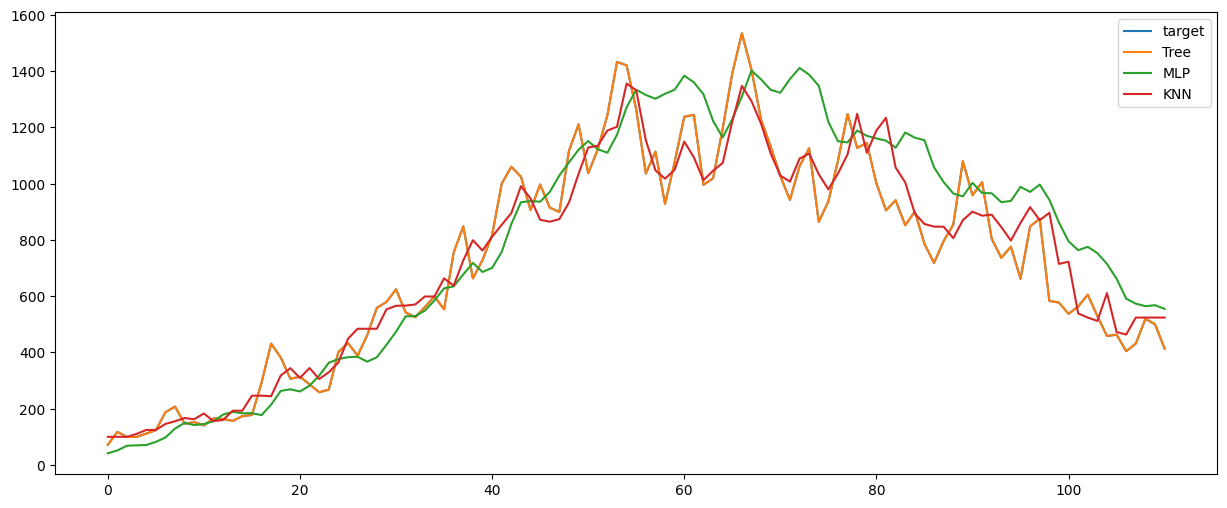

In [16]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

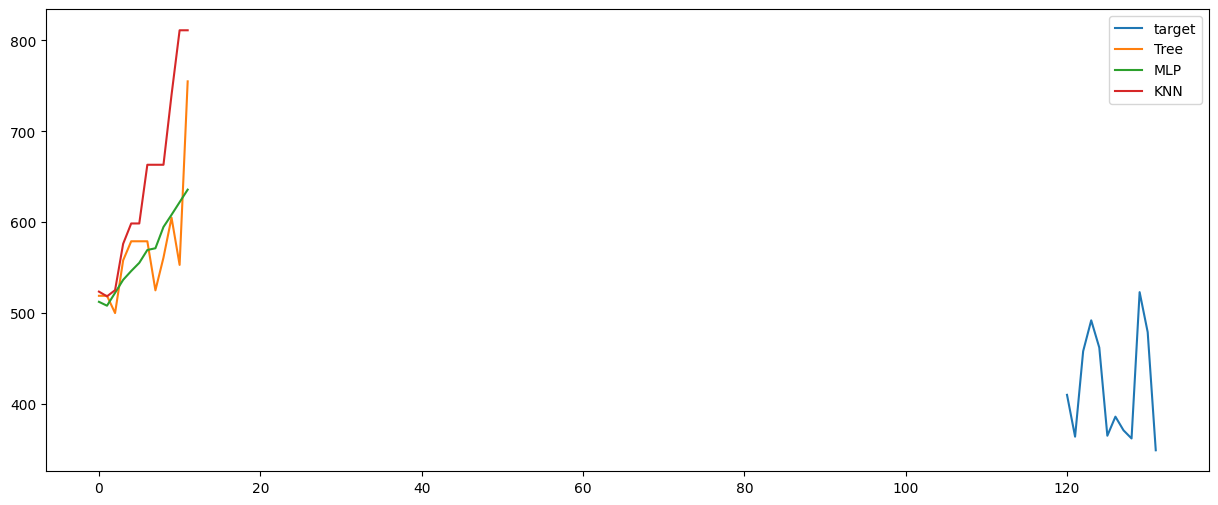

In [17]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()